# <span style='color:red'> Progetto Future Europa </span>
Questo notebook serve per capire passo passo quale è il processo per ottenere **shape detection** con _opencv_ ed altre librerie. 


## <span style='color:yellow'> Librerie open source  </span>

In [100]:
from __future__ import print_function
import random as rnd
import sys                                 # built-in di python lo uso per la gestione dei path
import numpy as np                         # calcolo numerico
import matplotlib.pyplot as plt            # visualizzazione grafica
import cv2                                 # open cv : manipolazione immagini

## <span style='color:yellow'> Carica l' immagine  </span>

In [101]:
nome_immagine = str('visibile\\vis1.jpg')
directory_progetto = str('\\immagini\\')
path_immagine = sys.path[0] + directory_progetto + nome_immagine
path_immagine

'c:\\Users\\Tech2\\Documents\\ermano\\immagini\\visibile\\vis1.jpg'

In [102]:
img = cv2.imread(path_immagine) # oggetto immagine di opencv

 ## <span style='color:yellow'>  Visualizza l'immagine </span>
 Utilizzo matplotlib.pyplot per visualizzare le immagini. E' possibile anche farlo utilizzando opencv o pillow, ma sono più dispendiosi in merito a memoria.

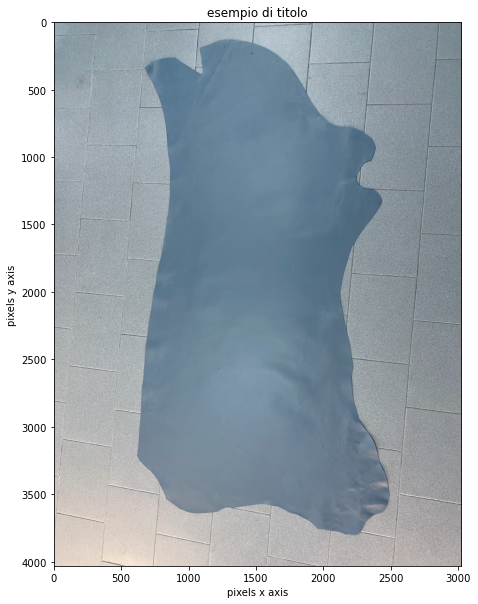

In [103]:
plt.figure(figsize=(15,10))
plt.title('esempio di titolo')
plt.xlabel('pixels x axis')
plt.ylabel('pixels y axis')

plt.imshow(img) # mostra l'immagine

### <span style='color:yellow'>  Converti i pixel in un altra scala di colori


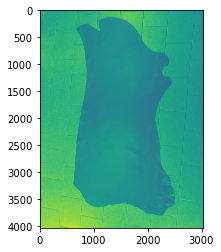

In [104]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

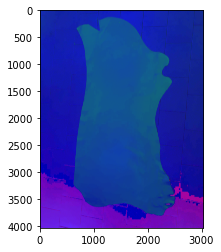

In [110]:
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(imgHSV)

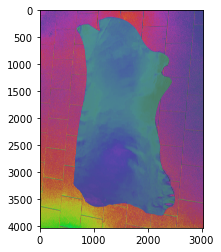

In [107]:
imgRGB = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
plt.imshow(imgRGB)

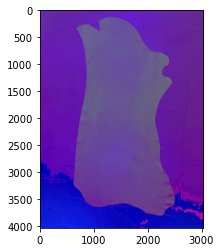

In [108]:
imgHSV = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(imgHSV)

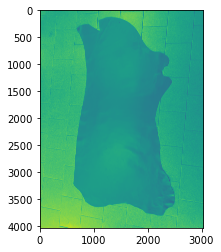

In [109]:
imgGRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGRAY)

## <span style='color:yellow'>  Filtrare colori

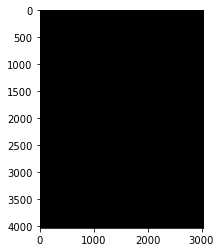

In [111]:
low_red = np.array([161,155,84]) # filtro rosso basso
high_red = np.array([179,255,255]) # filtro rosso alto


red_mask = cv2.inRange(imgHSV, low_red, high_red)
red = cv2.bitwise_or(imgHSV,img, mask=red_mask)

plt.imshow(imgHSV)
plt.imshow(red)

In [114]:
cv2.imshow('original', img)

Disegna contorni e maschera oggetti con 

https://www.youtube.com/watch?v=JOxebvuRpyo

In [92]:
img = cv2.imread(path_immagine) 
plt.imread(img, cv2.IMREAD_UNCHANGED)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

## <span style='color:yellow'>  Shape detection
Cercare di rilevare i bordi ed i contorni dell' oggetto nell'immagine attraverso opencv e l'AI. <br>
Utilizzo cv2.Canny() : permette il riconoscimento automatico dei perimetri di un oggetto.

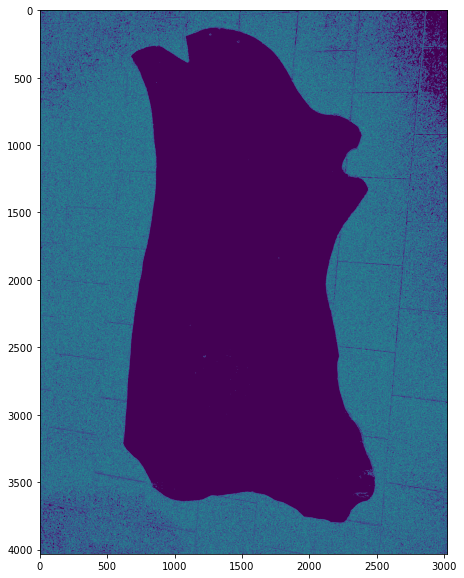

In [62]:
edges = cv2.Canny(imgRGB,150,180) 

plt.figure(figsize=(15,10))
plt.imshow(edges)

In [63]:
edges

array([[  0, 255, 255, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255,   0, 255, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0, 255, ...,   0, 255,   0]], dtype=uint8)

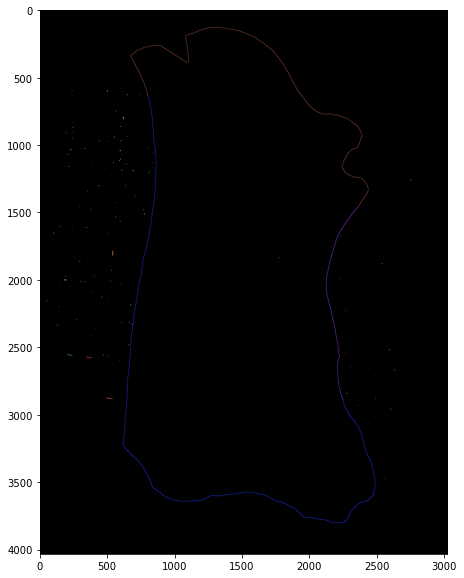

In [ ]:
plt.figure(figsize=(15,10))

def thresh_callback(val):
    threshold = val
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)     # Detect edges using Canny

    contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)     # Find contours

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)     # Draw contours


    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.drawContours(drawing, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)
    # Show in a window
    plt.imshow(drawing)

# Convert image to gray and blur it
src_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(src_gray, (3,3))

max_thresh = 255
thresh = 100 # initial threshold
thresh_callback(thresh)


Threshold adattativa con cv2.adaptiveThreshold()

In [ ]:
from tensorflow.keras.preprocessing import image

img = image.img_to_array(im1, dtype='uint8')

img = cv2.medianBlur(im1,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.CV_8UC1, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
# Block Size: 11 - It decides the size of neighbourhood area.
# C: 2 - It is just a constant which is subtracted from the mean or weighted mean calculated.

cv2.imshow('img1', img)
cv2.imshow('img2', th1)
cv2.imshow('mean', th2)
cv2.imshow('Gaussian', th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# ============plot===========

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [im1, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

 ## <span style='color:yellow'>  Converti il formato </span>
 Converti il formato dell' immagine con da .jpg a .png utilizzando la libreria open source Pillow

In [ ]:
from PIL import Image
img = Image.open(path_immagine) # apri immagine
img.save(path_immagine.replace('.jpg','.png')) # cambia formato